<a href="https://colab.research.google.com/github/Farhansyah15/PraktikumML156-22/blob/main/(versi_1)_Kegiatan_Modul_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #2**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang di bangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### **SOAL 1 :** 
---
Dalam mendefinisikan model Machine Learing ada banyak cara untuk mendapatkan model dengan performa terbaik salah satunya adalah hyperparameter tuning. Contoh hyperparameter tuning telah diberikan dalam materi di modul ini, dalam kegiatan ini telah diberikan sedikit contoh lain untuk mendefinisikan model hyperparameter tuning dengan hparam. **Tugas anda dalam kegiatan modul kali ini adalah membuat model CNN dengan hyperparameter tuning dengan ketentuan wajib sebagai berikut :**
* Menerapkan materi dari modul-modul sebelumnya (modul 2 dan 3)
* Menggunakan dataset [chest-xray-pneumonia](https://https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)
* Lakukan eksperimen model untuk mencari model CNN dengan performa terbaik untuk mengklasifikasikan dataset yang anda gunakan.
* Definisikan minimal 2 model CNN dengan komposisi parameter yang berbeda-beda.
* Masing-masing model memiliki **minimal** 25 epoch.
* Dalam mendefinisikan model, WAJIB melakukan tuning minimal pada 3 parameter model yang dirubah misalnya merubah jumlah neuron, nilai dropout, nilai learning rate, jenis optimizer, jenis activation function dsb.
* Visualisasikan hasil evaluasi performa model. Anda dapat menggunakan plot pada umumnya seperti grafik loss dan accuracy dengan matplotib atau visualisasi interaktif menggunakan tensorboard seperti pada contoh dibawah.
* Dari setiap paramater yang anda gunakan, analisis parameter mana yang paling berpengaruh terhadap nilai akurasi anda dan jelaskan mengapa.



In [1]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"farhan15","key":"33f31e5c4e68a388a5b256c5d36e026f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:16<00:00, 259MB/s]
100% 2.29G/2.29G [00:16<00:00, 149MB/s]


In [3]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
import zipfile

local_zip = 'chest-xray-pneumonia.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content') #mengeksrak file zip ke direktory yang sudah ditentukan
zip_ref.close()

In [4]:
#memindah file ke directory yang diminta
import shutil

base_datasets = '/content/chest_images'
dir_pneu = '/content/chest_images/pneumonia'
dir_norm = '/content/chest_images/normal'


shutil.move("/content/chest_xray/train/PNEUMONIA", dir_pneu)
shutil.move("/content/chest_xray/val/PNEUMONIA", dir_pneu)
!rm -r /content/chest_images/pneumonia/PNEUMONIA
shutil.move("/content/chest_xray/test/PNEUMONIA", dir_pneu)
shutil.move("/content/chest_xray/train/NORMAL", dir_norm)
shutil.move("/content/chest_xray/val/NORMAL", dir_norm)
!rm -r /content/chest_images/normal/NORMAL
shutil.move("/content/chest_xray/test/NORMAL", dir_norm)

'/content/chest_images/normal/NORMAL'

In [5]:
!pip install split-folders
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#split folder
import splitfolders

splitfolders.ratio(base_datasets, output='split_data', seed=13780, ratio=(0.7, 0.2, 0.1),group_prefix=None)

Copying files: 5216 files [00:04, 1203.34 files/s]


In [7]:
train_dir = '/content/split_data/train'
train_norm_dir = '/content/split_data/train/normal'
train_pneu_dir = '/content/split_data/train/pneumonia'

val_dir = '/content/split_data/val'
val_normal_dir = '/content/split_data/val/normal'
val_pneu_dir = '/content/split_data/val/pneumonia'

test_dir = '/content/split_data/test'
test_normal_dir = '/content/split_data/test/normal'
test_pneu_dir = '/content/split_data/test/pneumonia'

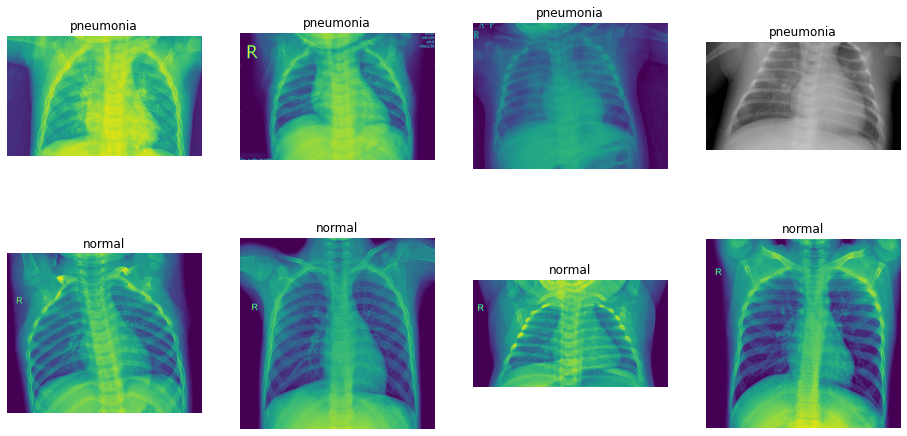

In [9]:
import cv2
import os
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=4
pneumonia_pix = [os.path.join(train_pneu_dir, fname) 
                for fname in os.listdir(train_pneu_dir)[pic_index-4:pic_index]]
normal_pix = [os.path.join(train_norm_dir, fname) 
                for fname in os.listdir(train_norm_dir)[pic_index-4:pic_index]]


for i, img_path in enumerate(pneumonia_pix+normal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  ttl = img_path.split("/")
  plt.title(ttl[-2])
  plt.imshow(img)

plt.show()

In [10]:
#normalisasi menggunakan ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

In [11]:
input_shape = (150, 150)

train_generator = datagen.flow_from_directory(train_dir,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

validation_generator = datagen.flow_from_directory(val_dir,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test_generator = datagen.flow_from_directory(test_dir,
                                              target_size=input_shape,
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 3650 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 523 images belonging to 2 classes.


In [12]:
rgb = (3, )
shape = input_shape+rgb

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, AveragePooling2D
from keras.optimizers import Adam

In [14]:
model1 = Sequential()

model1.add(InputLayer(input_shape=shape))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Dropout(0.25))
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(256, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation='softmax'))

# Print model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 128)      512       
 hNormalization)                                                 
                                                        

In [16]:
model1.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [17]:
H1 = model1.fit_generator(train_generator,
                             epochs = 50,
                             validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
115/115 [==============================] - 57s 410ms/step - loss: 5.7140 - acc: 0.8455 - val_loss: 10.8895 - val_acc: 0.7430
Epoch 2/50
115/115 [==============================] - 46s 397ms/step - loss: 0.2758 - acc: 0.9438 - val_loss: 6.9761 - val_acc: 0.7430
Epoch 3/50
115/115 [==============================] - 45s 390ms/step - loss: 0.1960 - acc: 0.9537 - val_loss: 3.0533 - val_acc: 0.8102
Epoch 4/50
115/115 [==============================] - 45s 392ms/step - loss: 0.1818 - acc: 0.9622 - val_loss: 0.3725 - val_acc: 0.9367
Epoch 5/50
115/115 [==============================] - 45s 390ms/step - loss: 0.0896 - acc: 0.9770 - val_loss: 0.2279 - val_acc: 0.9310
Epoch 6/50
115/115 [==============================] - 45s 392ms/step - loss: 0.0514 - acc: 0.9825 - val_loss: 0.3091 - val_acc: 0.9434
Epoch 7/50
115/115 [==============================] - 46s 399ms/step - loss: 0.0787 - acc: 0.9792 - val_loss: 0.2521 - val_acc: 0.9511
Epoch 8/50
115/115 [==============================] - 

In [18]:
model2 = Sequential()

model2.add(InputLayer(input_shape=shape))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
#model2.add(Dropout(0.25))
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(128, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(2, activation='sigmoid'))

# Print model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 256)       295168    
                                                                 
 batch_normalization_3 (Batc  (None, 38, 38, 256)     

In [19]:
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['acc'])

In [20]:
H2 = model2.fit_generator(train_generator,
                             epochs = 50,
                             validation_data = validation_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
115/115 [==============================] - 46s 397ms/step - loss: 0.6833 - acc: 0.7392 - val_loss: 0.5763 - val_acc: 0.7430
Epoch 2/50
115/115 [==============================] - 45s 391ms/step - loss: 0.3200 - acc: 0.8819 - val_loss: 0.4463 - val_acc: 0.7987
Epoch 3/50
115/115 [==============================] - 45s 389ms/step - loss: 0.1527 - acc: 0.9452 - val_loss: 0.2914 - val_acc: 0.9482
Epoch 4/50
115/115 [==============================] - 45s 391ms/step - loss: 0.0737 - acc: 0.9770 - val_loss: 0.2512 - val_acc: 0.8600
Epoch 5/50
115/115 [==============================] - 45s 391ms/step - loss: 0.0600 - acc: 0.9797 - val_loss: 0.1283 - val_acc: 0.9501
Epoch 6/50
115/115 [==============================] - 45s 392ms/step - loss: 0.0691 - acc: 0.9773 - val_loss: 0.1596 - val_acc: 0.9492
Epoch 7/50
115/115 [==============================] - 45s 389ms/step - loss: 0.0432 - acc: 0.9847 - val_loss: 0.1598 - val_acc: 0.9425
Epoch 8/50
115/115 [==============================] - 4

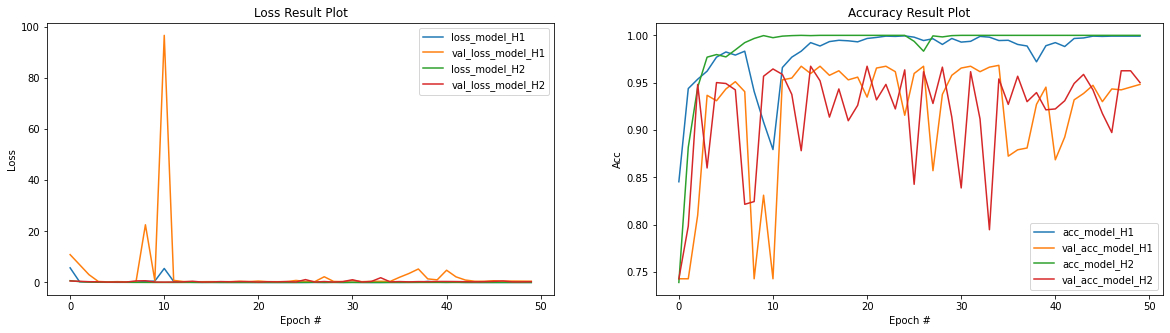

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 50), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 50), H1.history["val_loss"], label="val_loss_model_H1")
ax1.plot(np.arange(0, 50), H2.history["loss"], label="loss_model_H2")
ax1.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss_model_H2")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 50), H1.history["acc"], label="acc_model_H1")
ax2.plot(np.arange(0, 50), H1.history["val_acc"], label="val_acc_model_H1")
ax2.plot(np.arange(0, 50), H2.history["acc"], label="acc_model_H2")
ax2.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc_model_H2")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()


In [22]:
from sklearn.metrics import classification_report

print('================== model 1 ==================')
ypred = model1.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

print('================== model 2 ==================')
ypred = model2.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

================== model 1 ==================
17/17 [==============================] - 7s 422ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       135
           1       0.96      0.99      0.98       388

    accuracy                           0.96       523
   macro avg       0.96      0.94      0.95       523
weighted avg       0.96      0.96      0.96       523

================== model 2 ==================
17/17 [==============================] - 5s 264ms/step
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       135
           1       0.95      0.99      0.97       388

    accuracy                           0.95       523
   macro avg       0.96      0.92      0.94       523
weighted avg       0.95      0.95      0.95       523



### **SOAL 2 :**

---
Untuk mendapatkan penilaian pada soal ke 2 ini anda **wajib** mengerjakan soal nomer 1 terlebih dahulu. Tunjukkan kepada asisten bahwa anda telah menyelesaikan seluruh soal wajib diatas dan jelaskan dengan sebaik mungkin kepada asisten.


**Poin penilaian**
* Dapat menunjukkan dan menjelaskan hasil evaluasi masing-masing model yang digunakan.
* Dapat memvisualisasikan hasil evaluasi model dan menjelaskannya kepada asisten. 
* Menggunakan maptplotlib atau seaborn untuk visualisasi loss dan accuracy
* Menampilkan hasil evaluasi berupa nilai presisi, akurasi, recall, f1 score dan confusion matrix.
* Menggunakan tensorboard untuk visualisasi hasil evaluasi model menggunakan hyperparameter tuning.
* Menggunakan Hparam untuk tuning model.
* Hasil accuracy model terbaik >= 75% 
* Hasil loss model terbaik < 5%

In [23]:
# Tulis Program Anda Disini!
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [24]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [25]:
# menghapus semua logs sebelumnya
!rm -rf ./logs/ 

In [26]:
#mendefinisikan HP 
#melakukan percobaan 3 HP dalam model

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([64, 128]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.2, 0.5))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'adadelta']))

METRIC_ACCURACY = 'accuracy'

#Menyimpan semua summary hparam kedalam `logs/hparam_tuning` untuk digunakan oleh tensorboard dan sebagai penyimpanan sementara training information.

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [27]:
#Definisikan `x_val dan y_val` dari validation data untuk evaluasi model.

xvl, yvl = zip(*(validation_generator[i] for i in range(len(validation_generator))))
x_val, y_val = np.vstack(xvl), np.vstack(yvl)

In [28]:
# mendefinisikan Model menggunakan hparam.
# mendefinisikan compile model dan training model

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.relu, input_shape=(150,150,3)),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(64, (5, 5), activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Conv2D(32, (5, 5), activation=tf.nn.relu),
                                      tf.keras.layers.BatchNormalization(),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
                                      tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
                                      tf.keras.layers.Dense(2, activation=tf.nn.softmax),
                                      ])

  model.compile( optimizer=hparams[HP_OPTIMIZER],
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(train_generator, 
            validation_data=test_generator, 
            epochs=15,
            #steps_per_epoch=250,
            )
  _, accuracy = model.evaluate(x_val, y_val)
  return accuracy

In [29]:
# melakukan log record hparams yang berisi summary dari hyperparameters dan final accuracy-nya.

def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=50)

In [30]:
#proses training model

session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1


--- Starting trial: run-0
{'num_units': 64, 'dropout': 0.2, 'optimizer': 'adadelta'}
Epoch 1/15
115/115 [==============================] - 43s 362ms/step - loss: 2.1162 - accuracy: 0.3000 - val_loss: 0.7581 - val_accuracy: 0.2581
Epoch 2/15
115/115 [==============================] - 40s 348ms/step - loss: 1.7001 - accuracy: 0.3411 - val_loss: 0.7885 - val_accuracy: 0.2581
Epoch 3/15
115/115 [==============================] - 40s 345ms/step - loss: 1.4568 - accuracy: 0.3816 - val_loss: 0.9051 - val_accuracy: 0.2600
Epoch 4/15
115/115 [==============================] - 40s 350ms/step - loss: 1.2264 - accuracy: 0.4192 - val_loss: 0.9816 - val_accuracy: 0.2543
Epoch 5/15
115/115 [==============================] - 40s 348ms/step - loss: 1.0733 - accuracy: 0.4668 - val_loss: 0.9975 - val_accuracy: 0.2294
Epoch 6/15
115/115 [==============================] - 40s 348ms/step - loss: 1.0188 - accuracy: 0.4899 - val_loss: 0.9889 - val_accuracy: 0.2524
Epoch 7/15
115/115 [=========================

In [1]:
%tensorboard --logdir logs/hparam_tuning

UsageError: Line magic function `%tensorboard` not found.


## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md. Contoh README.md yang baik bisa dilihat dari github berikut: [click me](https://github.com/muhfadh/Tugas_Praktikum_ML_A_297-233)
* Cek daftar dataset seluruh praktikan [disini](https:xxxx)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 sampai 3 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * balancing dataset menggunakan teknik oversampling / downsampling
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Menerapkan learning rate scheduller
 * Menggunakan hyperparameter tuning
 * Minimal 50 epoch per model
* Menyimpan model yang telah di training kedalam file `.json` dan weight kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/guide/keras/save_and_serialize)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

